In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# %matplotlib.inline

In [5]:
df = pd.read_pickle('../tweets_cleaned.pkl')

In [7]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(12688, 5)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(9912, 5)

In [12]:
df.head()

,text_info,text_human,tweet_text,event,info_binary
0,not_informative,not_relevant_or_cant_judge,"congrats on hitting yoir goal guys, i'm sure t...",harvey,0
1,informative,injured_or_dead_people,USERID #ajwamood : harvey the first major hur...,harvey,1
8,informative,other_relevant_information,USERID when we get back to schs after harvey ...,harvey,1
9,informative,other_relevant_information,not always good when your city shows up on a s...,harvey,1
10,informative,other_relevant_information,USERID side by side satellite images compare ...,harvey,1


In [13]:
text = ' '.join(tweet for tweet in df.tweet_text)

In [16]:
text = text.replace('USERID','')

In [17]:
text = text.replace('HTTP','')

In [31]:
text = text.replace('\\','')

In [23]:
text = text.replace("&gt","")

In [32]:
text

'congrats on hitting yoir goal guys, i\'m sure the victims of harvey will appreciate it greatly    #ajwamood : harvey the first major hurricane to strike the #us since 2005 , causes at least 1 fatality    when we get back to schs after harvey hits :  not always good when your city shows up on a severe weather map. á¼²7â›ˆá¼²a #hurricaneharvey #itaintoveryet    side by side satellite images compare the size of hurricane harvey to hurricane katrina in 2005.    we survived once we can survive again #hurricaneharvey    my street in se #houston is now a river. that light is from lightning; it\'s 10pm #harvey  exas county\'s long recovery from hurricane harvey\xa0begins   hypervocal: help hurricane harvey victims in texas      tornado forming on barker cypress near lone star college!     flooding in bellaire. #hurricaneharvey  1 dead as harvey continues to churn over texas     harvey strands 20,000 cruise ship passengers in the gulf ---;   a few showers from harvey will be possible mid-late 

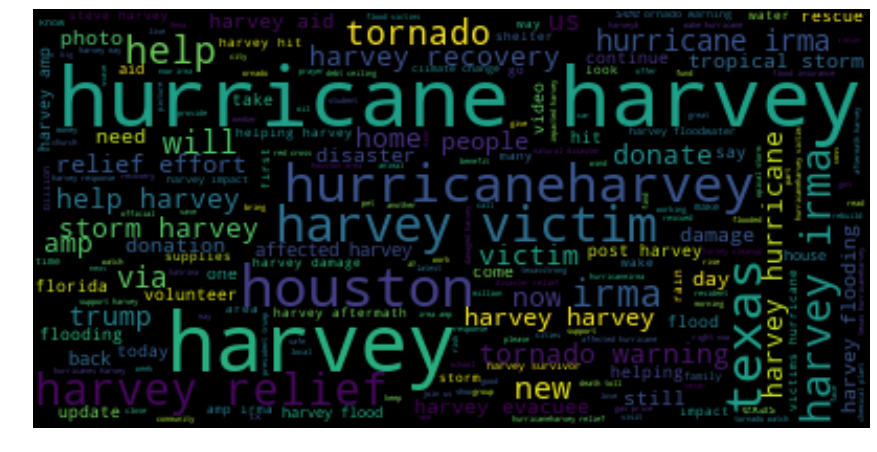

In [37]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Define function to create wordclouds
def make_wc(mask):
    # use visualizer to create word frequency list for Wordcloud
    # (it is also possible to let wordcloud create the list)
    docs       = cvec.fit_transform(text for text in df['text'][mask])
    features   = cvec.get_feature_names()
    #create dataframe of word frequencies
    word_freq = pd.DataFrame({'word':features,'freq':list(visualizer.count(docs))})
    word_freq = word_freq.sort_values(by = ['freq'],ascending=False)
    # convert df into dict
    w_dict = dict([(word_freq['word'].iloc[i],word_freq['freq'].iloc[i]) for i in range(len(word_freq))])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=1000,height=500,scale=1,background_color="white").generate_from_frequencies(w_dict)
    # Display the generated image:
    plt.rcParams['figure.figsize'] = (20, 10)
    fig = plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()
    return fig